In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# fix your paths here
SOURCE_DIR = "D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/dataset-resized"
TRAIN_DIR = "D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/data_split/train"
TEST_DIR = "D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/data_split/test"

# Create target folders
for target_dir in [TRAIN_DIR, TEST_DIR]:
    os.makedirs(target_dir, exist_ok=True)

# For each class folder
for class_name in os.listdir(SOURCE_DIR):
    class_path = os.path.join(SOURCE_DIR, class_name)
    if os.path.isdir(class_path):
        # All images
        images = os.listdir(class_path)

        # Split indices
        train_files, test_files = train_test_split(
            images, test_size=0.2, random_state=42
        )

        # Create class folders in train/test
        train_class_dir = os.path.join(TRAIN_DIR, class_name)
        test_class_dir = os.path.join(TEST_DIR, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Copy files
        for f in train_files:
            src = os.path.join(class_path, f)
            dst = os.path.join(train_class_dir, f)
            shutil.copy(src, dst)

        for f in test_files:
            src = os.path.join(class_path, f)
            dst = os.path.join(test_class_dir, f)
            shutil.copy(src, dst)

print("✅ Dataset split completed.")


✅ Dataset split completed.


In [6]:
import os

data_dir = "D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/dataset-resized"
classes = os.listdir(data_dir)

for cls in classes:
    folder = os.path.join(data_dir, cls)
    print(cls, ":", len(os.listdir(folder)))


cardboard : 403
glass : 501
metal : 410
paper : 594
plastic : 482


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/data_split/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    "D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/data_split/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1910 images belonging to 5 classes.
Found 480 images belonging to 5 classes.


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(128,128,3)
)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Example: get class weights
classes = list(train_gen.class_indices.keys())
y_train = train_gen.classes
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

class_weights = dict(zip(np.unique(y_train), weights))
print(class_weights)

# Use in model.fit()
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen,
    class_weight=class_weights
)


{np.int32(0): np.float64(1.186335403726708), np.int32(1): np.float64(0.955), np.int32(2): np.float64(1.1646341463414633), np.int32(3): np.float64(0.8042105263157895), np.int32(4): np.float64(0.9922077922077922)}


c:\ProgramData\anaconda3\envs\smart_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.4348 - loss: 1.6060 - val_accuracy: 0.7396 - val_loss: 0.6575
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 53s 888ms/step - accuracy: 0.7348 - loss: 0.6979 - val_accuracy: 0.7479 - val_loss: 0.6442
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 459ms/step - accuracy: 0.7697 - loss: 0.6085 - val_accuracy: 0.7667 - val_loss: 0.6013
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.7868 - loss: 0.5474 - val_accuracy: 0.7521 - val_loss: 0.6233
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.7895 - loss: 0.5385 - val_accuracy: 0.7917 - val_loss: 0.5544
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.8324 - loss: 0.4697 - val_accuracy: 0.7937 - val_loss: 0.5483
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.8178 - loss: 0.4912 - val_accuracy: 0.7771 - val_loss: 0.5871
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.8272 - loss: 0.4346 - val_accurac

In [10]:
model.save("waste_model.keras")


NameError: name 'output_dir' is not defined

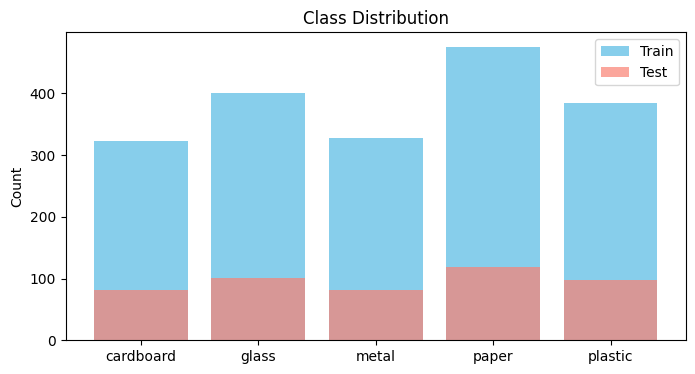

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Compute class counts
train_counts = collections.Counter(train_gen.classes)
test_counts = collections.Counter(test_gen.classes)

class_labels = list(train_gen.class_indices.keys())

# Plot
plt.figure(figsize=(8,4))
plt.bar(
    class_labels,
    [train_counts[i] for i in range(len(class_labels))],
    color='skyblue',
    label='Train'
)
plt.bar(
    class_labels,
    [test_counts[i] for i in range(len(class_labels))],
    color='salmon',
    alpha=0.7,
    label='Test'
)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.legend()

# Save to file
plot_path = os.path.join(output_dir, "class_distribution.png")
plt.tight_layout()
plt.savefig(plot_path)
plt.show()

print(f"Plot saved to: {plot_path}")


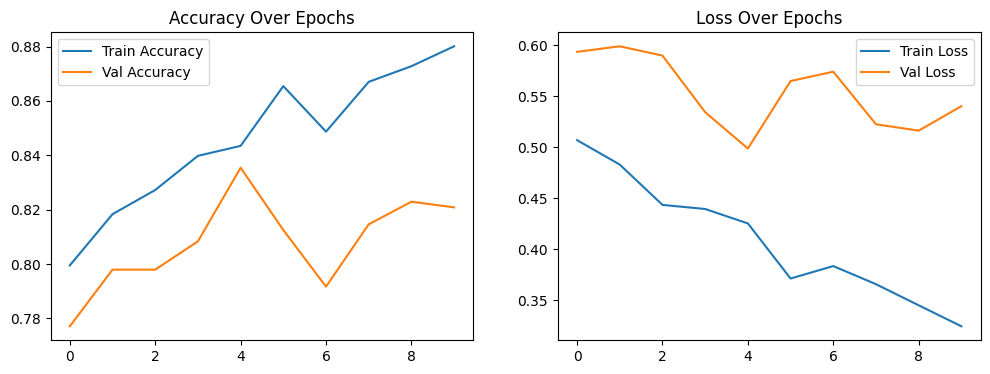

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Over Epochs")
plt.legend()

plt.show()


In [ ]:
import numpy as np

# Predict probabilities
y_probs = model.predict(test_gen, verbose=1)

# Convert to predicted classes
y_pred = np.argmax(y_probs, axis=1)

# True labels
y_true = test_gen.classes

# Class names
class_names = list(test_gen.class_indices.keys())

print("Done predicting!")
print("Shape y_true:", y_true.shape)
print("Shape y_pred:", y_pred.shape)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step
Done predicting!
Shape y_true: (480,)
Shape y_pred: (480,)


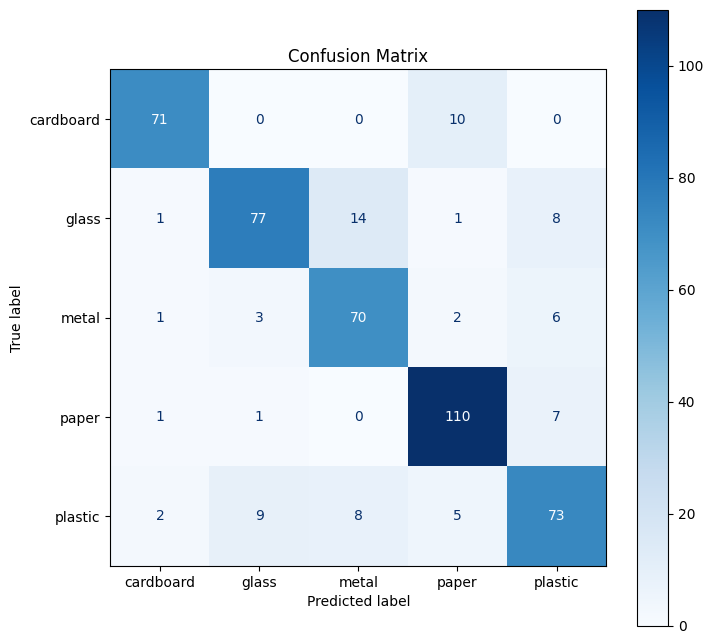

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.savefig(os.path.join(output_dir, "confusion.png"))
plt.show()


C:\Users\nagan\AppData\Local\Temp\ipykernel_11120\744810782.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nagan\AppData\Local\Temp\ipykernel_11120\744810782.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nagan\AppData\Local\Temp\ipykernel_11120\744810782.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


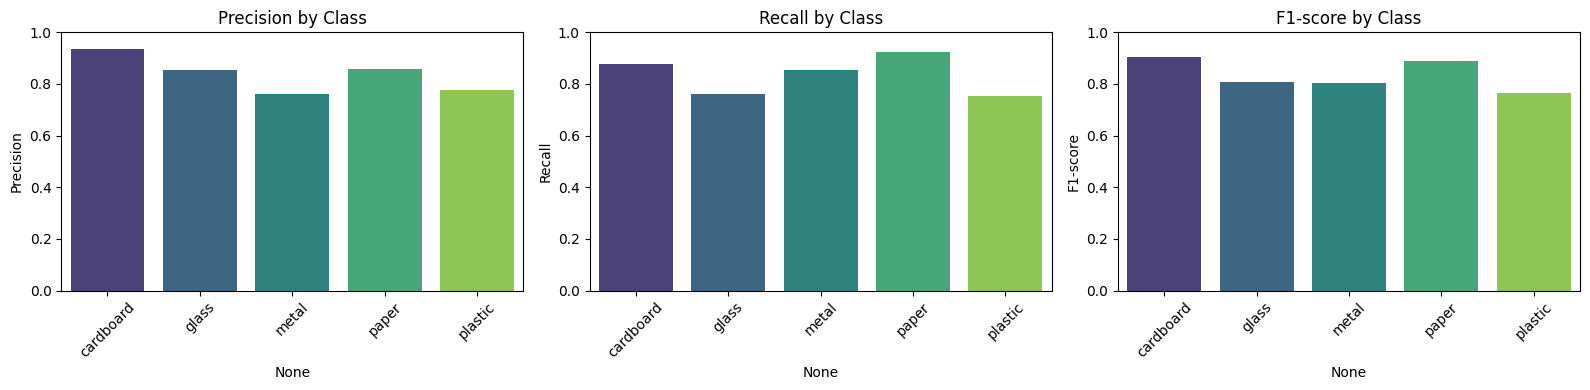

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(16,4))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(
        x=report_df_classes.index,
        y=report_df_classes[metric],
        palette="viridis"
    )
    plt.ylim(0, 1)
    plt.title(f"{metric.capitalize()} by Class")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


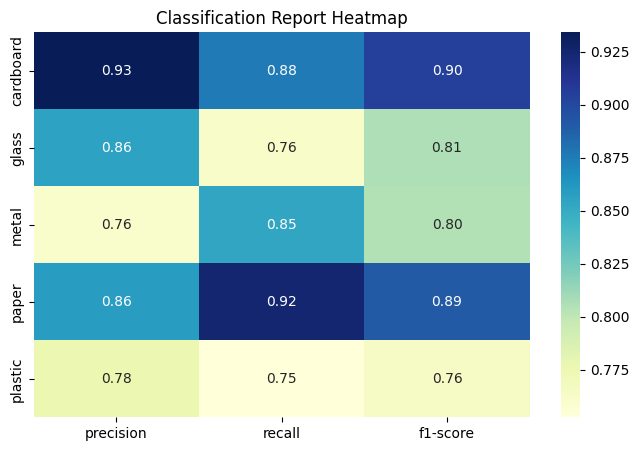

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(
    report_df_classes[["precision", "recall", "f1-score"]],
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=True
)
plt.title("Classification Report Heatmap")
plt.show()


In [ ]:
import os

output_dir = r"D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/notebooks/static/plots"
os.makedirs(output_dir, exist_ok=True)


In [ ]:
plt.savefig(os.path.join(output_dir, "classification_metrics_barplots.png"))


<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create the output folder first
output_dir = r"D:/MICROSOFT_AICTE INTERN/SMART_VIOLATION/project/notebooks/static/plots"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(16,4))
for i, metric in enumerate(["precision", "recall", "f1-score"], 1):
    plt.subplot(1, 3, i)
    sns.barplot(
        x=report_df_classes.index,
        y=report_df_classes[metric],
        palette="viridis"
    )
    plt.ylim(0, 1)
    plt.title(f"{metric.capitalize()} by Class")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "classification_metrics_barplots.png"))
plt.close()


C:\Users\nagan\AppData\Local\Temp\ipykernel_11120\1055874628.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nagan\AppData\Local\Temp\ipykernel_11120\1055874628.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\nagan\AppData\Local\Temp\ipykernel_11120\1055874628.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(
    report_df_classes[["precision", "recall", "f1-score"]],
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=True
)
plt.title("Classification Report Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "classification_metrics_heatmap.png"))
plt.close()
